In [1]:
%matplotlib inline
import research_kit_bottom_trend_follow as rk

merged_results = rk.get_joined_params_and_summary()
normal_results = merged_results.query("inverse_trading == False")

downloading BTC/USD data on bitmex
downloading 2019-12-31 01:35:30 ~ 2019-12-31 01:46:39.287587 data
100.0% completed
data loaded


In [2]:
def visualize_timeframe1_clusters_with_xy(df, figure_title, x_axis,y_axis):
    rk.plt.rcParams['figure.figsize'] = (5.0, 5.0)
    figure_timeframe1_cluster_all = rk.plt.figure()
    figure_timeframe1_cluster_all.suptitle(figure_title, fontsize=16, y=1.01)
    
    graph1 = figure_timeframe1_cluster_all.add_subplot(1,1,1)
    graph1.set_title("clustering in timeframe 1")
    graph1.set_xlabel(x_axis)
    graph1.set_ylabel(y_axis)
    graph1.scatter(df[df.timeframe == 1][x_axis],
               df[df.timeframe == 1][y_axis],
               alpha=0.5,linewidths="1", label="timeframe:1", color="r")
    
    figure_timeframe1_cluster_all.tight_layout()
    figure_timeframe1_cluster_all.show()

In [3]:
def visualize_timeframe1_clusters_with_xy_for_each_param(df, figure_title, x_axis, y_axis):
    rk.plt.rcParams['figure.figsize'] = (20.0, 20.0)
    figure_timeframe1_cluster_for_each_param = rk.plt.figure()
    figure_timeframe1_cluster_for_each_param.suptitle(figure_title, fontsize=16, y=1.01)
    
    bottom_trend_tick_params = [5,10,15,20,25,30,35,40,45,50]
    middle_trend_tick_params = [3,5,7,9,12,15,18,21,24,27,30]
    top_trend_tick_params = [1,2,3,4,5,6,7,8]
    
    trend_tick_params = {
        "bottom_trend_tick": bottom_trend_tick_params,
        "middle_trend_tick": middle_trend_tick_params,
        "top_trend_tick": top_trend_tick_params
    }
    
    i = 1
    
    for trend, tick_params in trend_tick_params.items():
        graph = figure_timeframe1_cluster_for_each_param.add_subplot(3,1,i)
        graph.set_title("clustering in timeframe 1 with " + trend)
        graph.set_xlabel(x_axis)
        graph.set_ylabel(y_axis)
        for tick_param in tick_params:
            graph.scatter(df[(df.timeframe == 1) & (df[trend] == tick_param)][x_axis],
                          df[(df.timeframe == 1) & (df[trend] == tick_param)][y_axis],
                          alpha=0.5,linewidths="1", label=trend +":" + str(tick_param),
                          color=(tick_param/rk.np.max(tick_params),0,1-tick_param/rk.np.max(tick_params)))
            graph.legend()
        i += 1
            
    #print(df.head(10))
    #print(df.tail(10))
    
    figure_timeframe1_cluster_for_each_param.tight_layout()
    figure_timeframe1_cluster_for_each_param.show()

In [7]:
def pickup_top_tick_with_xy(df, figure_title, pick_up_array, x_axis, y_axis, separate=False):
    figure_top = rk.plt.figure()
    figure_top.suptitle(figure_title, fontsize=16, y=1.01)
    
    top_trend_tick_params = [1,2,3,4,5,6,7,8]
    
    picked_df_array = []
    for tick_param in pick_up_array:
        picked_df_array.append(df[(df.timeframe == 1) & (df["top_trend_tick"] == tick_param)])
        
    picked_df = rk.pd.concat(picked_df_array)
    rk.plt.rcParams['figure.figsize'] = (20.0, 20.0)
    
    linear_model = rk.linear_model.LinearRegression()
    
    rk.plt.rcParams['figure.figsize'] = (20.0, len(pick_up_array)*5.0)
    
    for i, tick_param in enumerate(pick_up_array):
        if separate:
            graph = figure_top.add_subplot(len(pick_up_array), 1, i+1)
        else:
            graph = figure_top.add_subplot(1, 1, 1)
            rk.plt.rcParams['figure.figsize'] = (20.0, 6.66*(len(pick_up_array)))
      
        x = picked_df[picked_df["top_trend_tick"] == tick_param][x_axis]
        y = picked_df[picked_df["top_trend_tick"] == tick_param][y_axis]
        linear_model.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))
        
        graph.set_title("timeframe: 1, top_trend_tick: " + str(tick_param))
        graph.set_xlabel(x_axis)
        graph.set_ylabel(y_axis)
        graph.set_xlim(picked_df[x_axis].min(), picked_df[x_axis].max())
        graph.set_ylim(picked_df[y_axis].min(), picked_df[y_axis].max())
        graph.scatter(x, y,alpha=0.5,linewidths="1", label="top_trend_tick :" + str(tick_param),
            color=(tick_param/rk.np.max(top_trend_tick_params),0,1-tick_param/rk.np.max(top_trend_tick_params)))
        graph.plot(x, linear_model.predict(x.values.reshape(-1,1)))
        graph.vlines(x.mean(), ymin=y.min(), ymax=y.max(), color="r")
        graph.hlines(y.mean(), xmin=-999999, xmax=x.max(), color="r")
        print("====================================")
        print("tick_param:" + str(tick_param))
        print("intercept : " + str(linear_model.intercept_))
        print("coefficient : " + str(linear_model.coef_))
        print("===")
        print(x_axis + " mean : " + str(x.mean()))
        print(x_axis + " standard deviation : " + str(x.std()))
        print(y_axis + " mean : " + str(y.mean()))
        print(y_axis + " standard deviation : " + str(y.std()))
        print("R-squared : " + str(linear_model.score(x.values.reshape(-1,1), y.values.reshape(-1,1))))
        
    top_tick_1 = picked_df[picked_df["top_trend_tick"] == 1][y_axis]
    top_tick_2 = picked_df[picked_df["top_trend_tick"] == 2][y_axis]
    rk.f_and_t_test(top_tick_1, top_tick_2)
                  
    figure_top.tight_layout()
    figure_top.show()

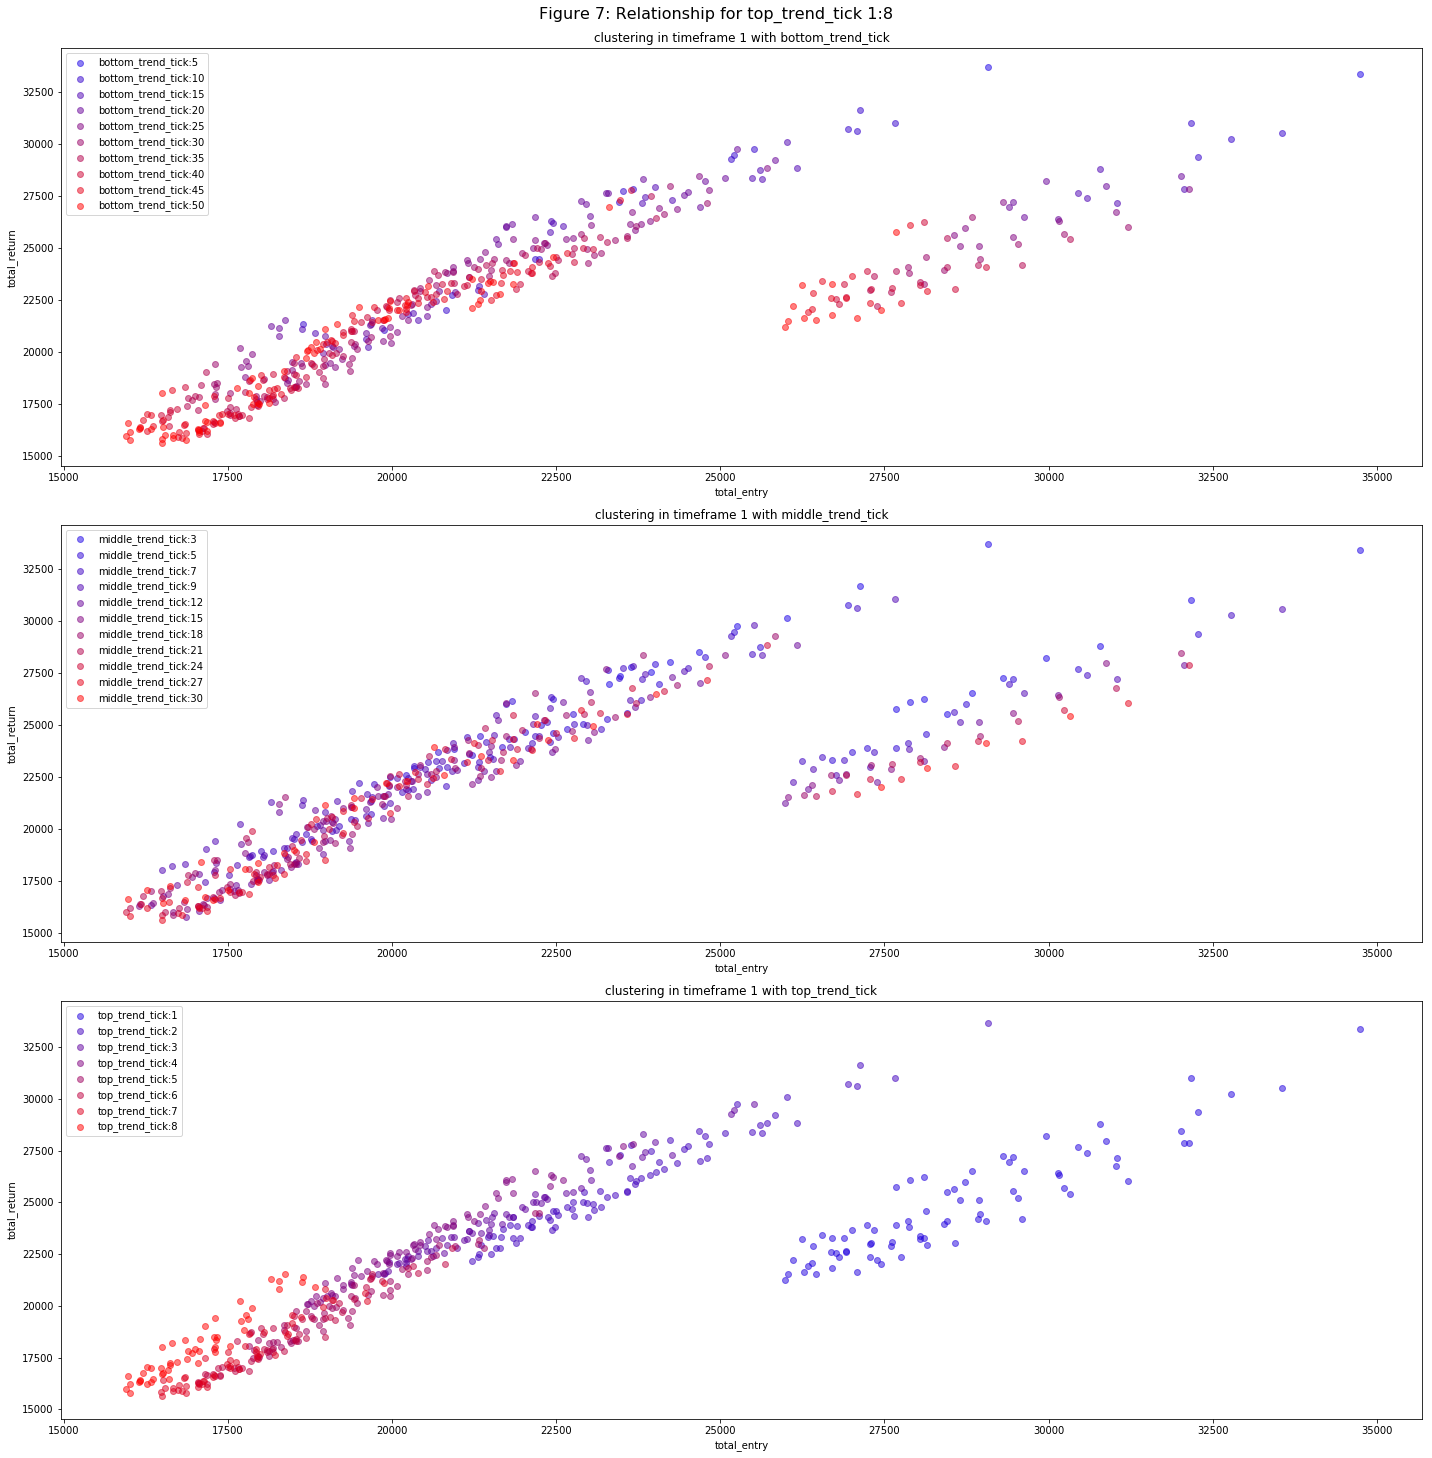

In [10]:
visualize_timeframe1_clusters_with_xy_for_each_param(normal_results,
                "Figure 7: timeframe 1min, 3 different types of paramaters", "total_entry", "total_return")

### Figure 7 Summary
見たところではこの集団を大きく分けるのはtop trend tickが考えられそうである。
なぜならばtop trend tick=1のとき、右のクラスタのすべての集団が青いからである。
まず1~8のtickを抽出する

tick_param:1
intercept : [-9633.80923382]
coefficient : [[1.20309827]]
===
total_entry mean : 28656.85
total_entry standard deviation : 1950.9146190012805
total_return mean : 24843.197499999987
total_return standard deviation : 2545.8341976188913
R-squared : 0.8499991682105521
tick_param:2
intercept : [-7870.87920557]
coefficient : [[1.43667523]]
===
total_entry mean : 23494.925
total_entry standard deviation : 1681.6412550718103
total_return mean : 25883.697500000006
total_return standard deviation : 2474.9882698596853
R-squared : 0.9528787079827928
tick_param:3
intercept : [-7730.88324476]
coefficient : [[1.47884041]]
===
total_entry mean : 21718.27142857143
total_entry standard deviation : 1399.169473335475
total_return mean : 24386.97428571427
total_return standard deviation : 2102.0203763326363
R-squared : 0.9689679689678766
tick_param:4
intercept : [-10698.73194278]
coefficient : [[1.651315]]
===
total_entry mean : 20401.2
total_entry standard deviation : 1245.9314727474414
total

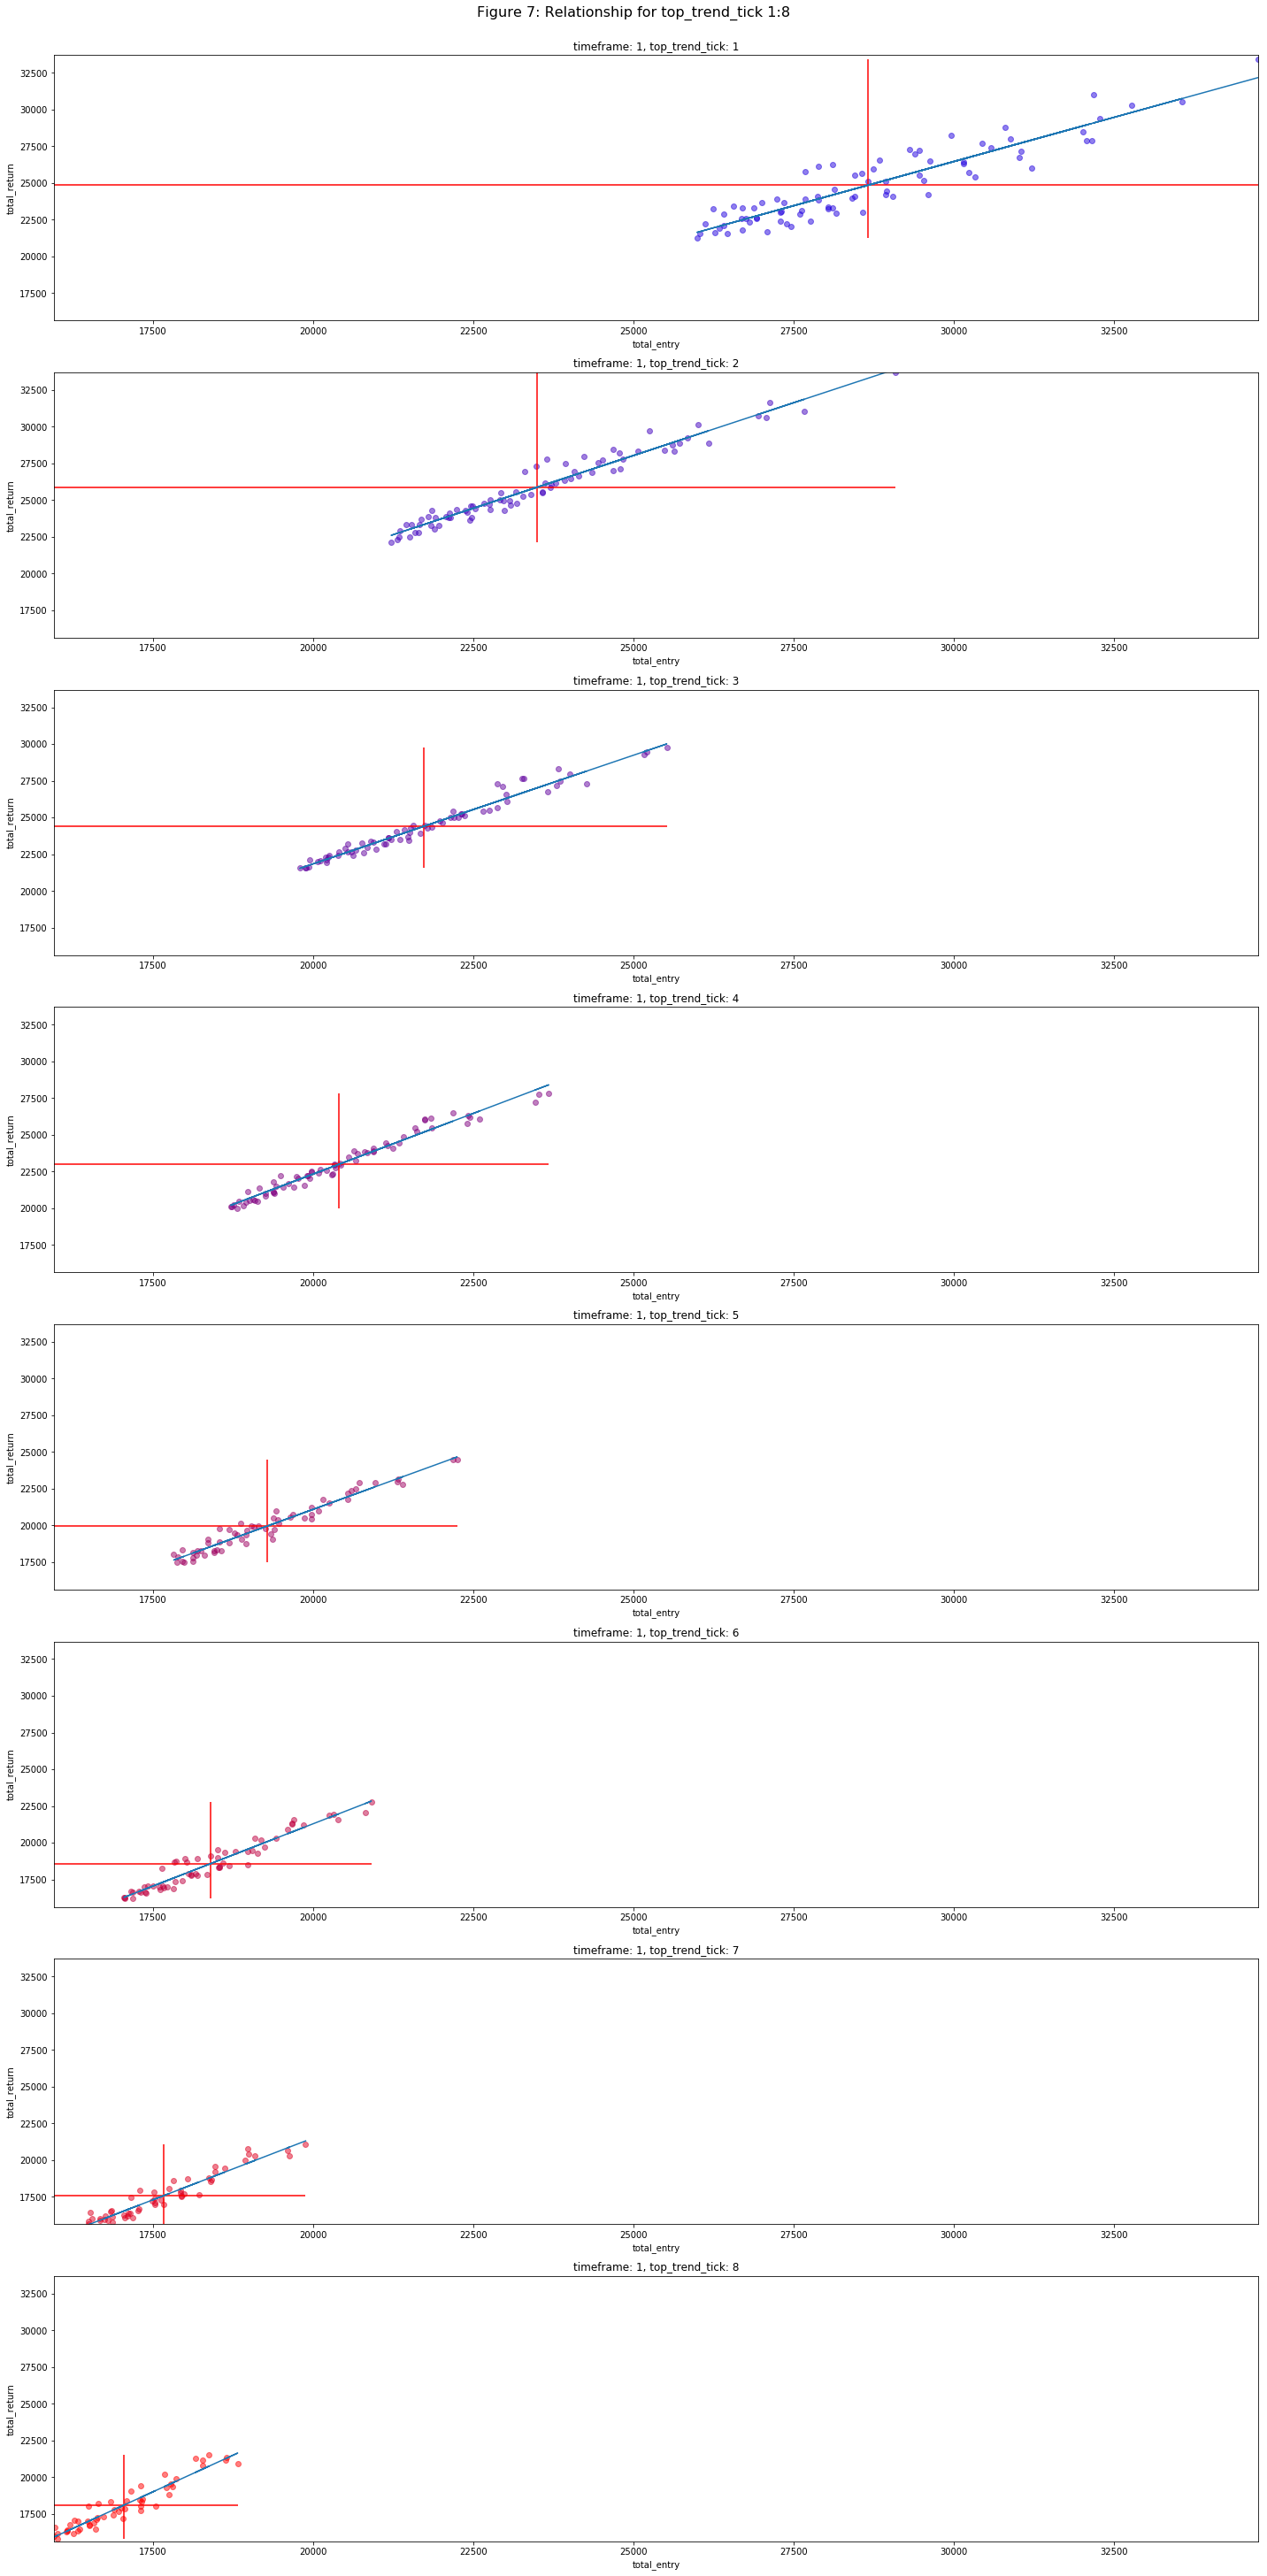

In [8]:
pickup_top_tick_with_xy(normal_results, "Figure 8: Relationship for top_trend_tick 1:8 separated", [1,2,3,4,5,6,7,8],
                "total_entry", "total_return", True)

## Figure 8 Summary

x軸に総エントリー回数, y軸に総利益を設定してそれぞれのtop trendから抽出した。

これは単回帰なので、adjusted R-squaredや多重共線性を気にする必要はない。

### Regression
回帰の結果を見るといずれの場合も高いR-squaredを得られている。
これが意味するところは、総利益のうちの85%以上は総エントリー回数によって説明できるということである。

重要なtickであるtick=1の場合においては、その総利益の84%を総エントリー回数によって説明できるとしているが、これは他のtickに比べて顕著に低い。
tick=1の場合においてはその総利益は他に説明できる変数がまだ存在しているかもしれない。
その他のtickにおいては90~97%が総エントリー回数によって説明できる言える。

### Statistics and Distribution
また総利益の平均を見るとtick=2のときのほうがtick=1のときよりも、有意に高いことがわかる。
統計的仮説検定では分散が等しいかをテストし、同一の分散としてt検定を行うと1%有意水準で統計的に有意であるという結果を得た。

それと同時に総取引回数もtick=1の方が多い。
timeframe=>1, bottom=>5, middle=>3, top=>2も重要なパラメータ候補に追加することにする。

グラフを見ると、取引回数の平均値は、tickが上がるにつれて低下する。
基本的にtrend tickが小さければ小さいほど良い結果をもたらしていることが見て取れる。
しかしtick=2を境目に有意にその関係は崩れ、tick=1の方が低い結果をもたらしている。

### Conclusion
timeframe=>1, bottom=>5, middle=>3, top=>2の方が期待できる収益が高い可能性がある。

tick_param:1
intercept : [-60874.97136834]
coefficient : [[2502.3228097]]
===
win_rate mean : 34.25544000000001
win_rate standard deviation : 0.551006960281339
total_return mean : 24843.197499999987
total_return standard deviation : 2545.8341976188913
R-squared : 0.293319277920418
tick_param:2
intercept : [-54251.99969613]
coefficient : [[2209.82830606]]
===
win_rate mean : 36.263313749999995
win_rate standard deviation : 0.3993857326938837
total_return mean : 25883.697500000006
total_return standard deviation : 2474.9882698596853
R-squared : 0.1271615659516201
Kormogorov Smirnov test
KS     :0.25
p-value:0.013191885548795407
p <= 0.05, These distribution have a difference
F-test
F:        1.058
p-value:  0.803
p > 0.05, Equal variance
t-test for equal veriance
t:        -2.621
p-value:  0.01
p < 0.05, The averages are different.


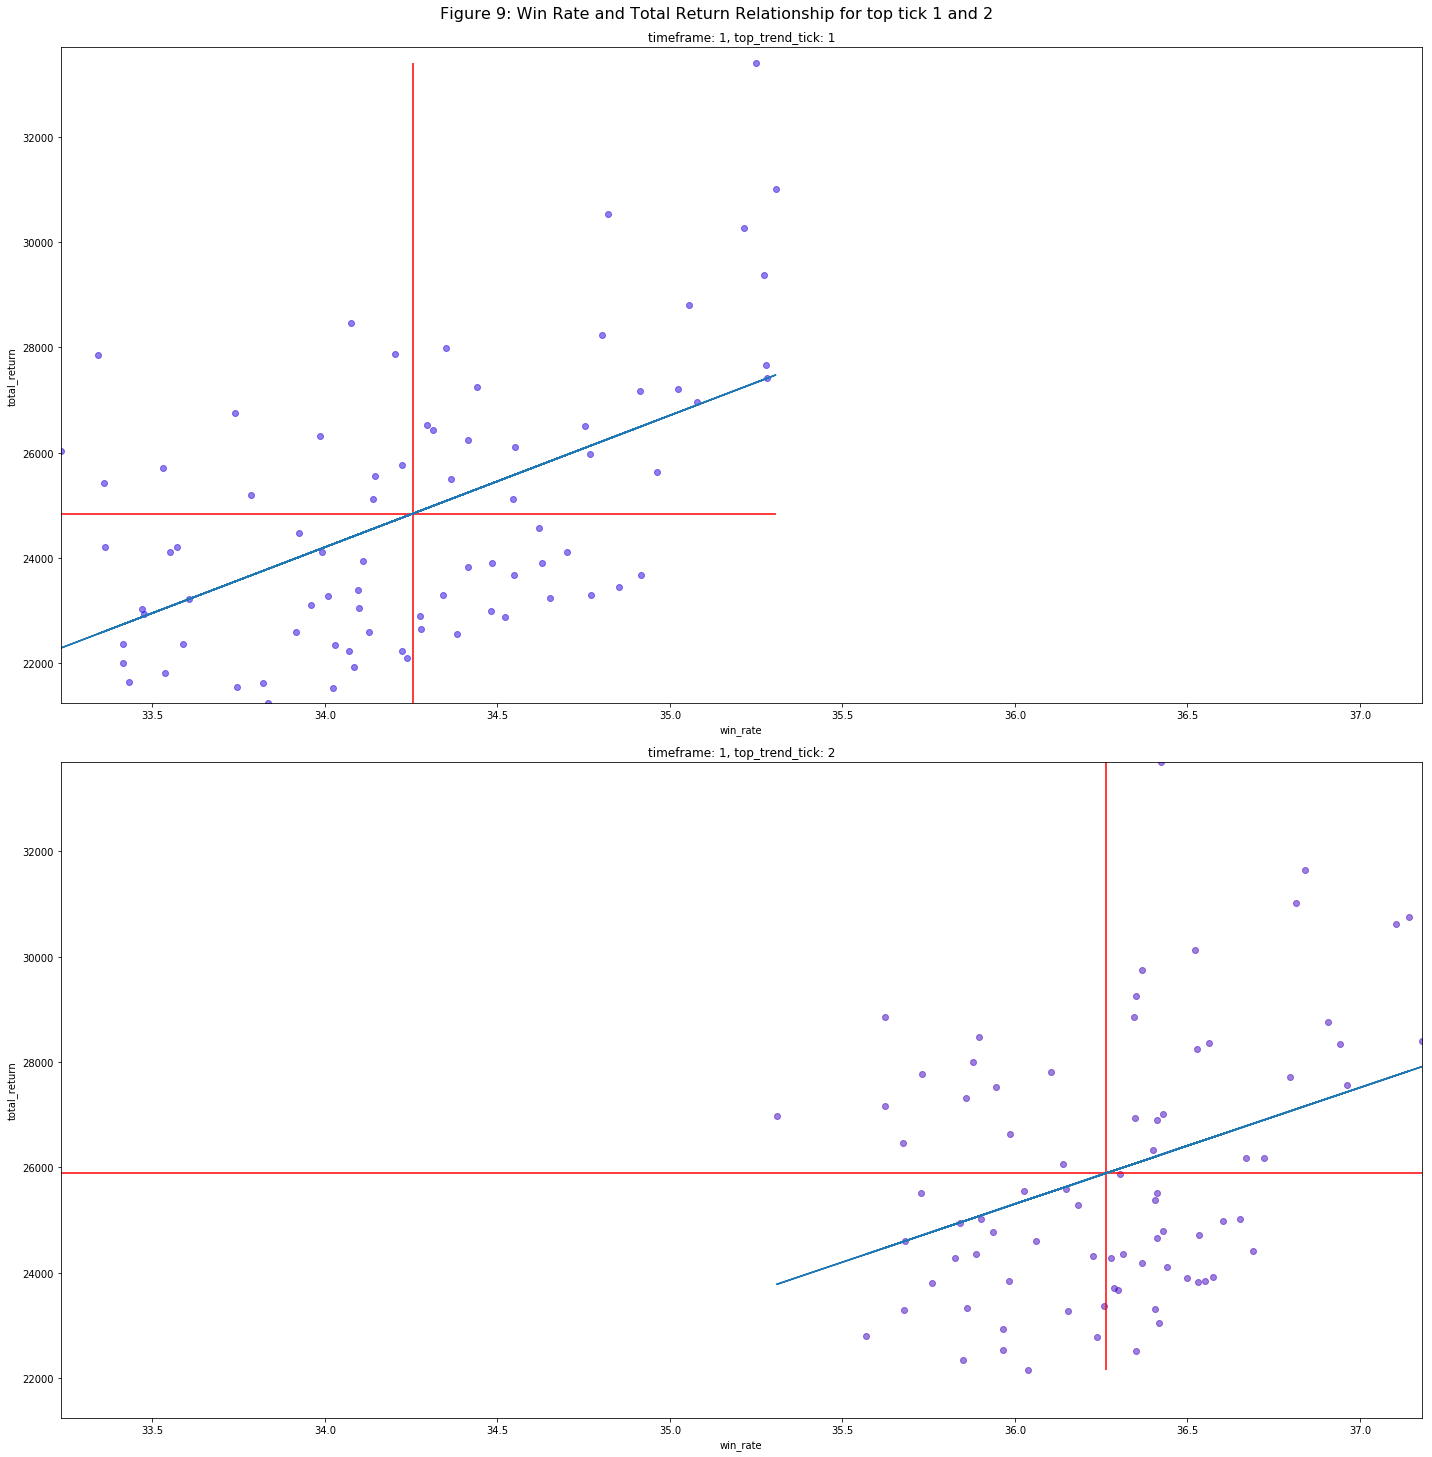

In [11]:
pickup_top_tick_with_xy(normal_results, "Figure 9: Win Rate and Total Return Relationship for top tick 1 and 2", [1,2] ,
                        "win_rate", "total_return", True)